
### <font color= Blue> Problem Statement 


A US-based housing company named Surprise Housing has decided to enter the Australian market. Goal is to model the price of houses with the available independent variables (Data already provided by the company). This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

    Which variables are significant in predicting the price of a house, and
    How well those variables describe the price of a house.
    determine the optimal value of lambda for ridge and lasso regression.

- Submission by VARUN SHENOY 

 



#### 1. UNDERSTANDING THE DATA

In [1]:
# libreries initialization

# Data libreries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings 
warnings.filterwarnings('ignore')

#visualization libreries
import matplotlib.pyplot as plt
import seaborn as sns

# Regression and support libries
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [2]:
SH_df= pd.read_csv("train.csv")
SH_df.head(15)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     2Story            9            5       2005   
12       Norm     1Fam     1Story            5            6       1962   
13       Norm     1Fam     1Story            7            5       2006   
14       Norm     1Fam     1Story            6            5       1960   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           1976     Gable  CompShg     MetalSd     MetalSd       None   
2           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5           1995     

In [3]:
SH_df.tail(15)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pave   NaN      Reg   
1449  1450         180       RM         21.0     1533   Pave   NaN      Reg   
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1445         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1446         Lvl    AllPub   CulDSac       Gtl      Mitchel       Norm   
1447         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1448         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1449         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1450         Lvl    AllPub       FR2       Gtl        NAmes       Norm   
1451         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1452         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1453         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1454         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1445       Norm     1Fam     SFoyer            6            5       1966   
1446       Norm     1Fam     1Story            5            7       1962   
1447       Norm     1Fam     2Story            8            5       1995   
1448       Norm     1Fam     2Story            4            7       1910   
1449       Norm    Twnhs     SFoyer            5            7       1970   
1450       Norm   Duplex     2Story            5            5       1974   
1451       Norm     1Fam     1Story            8            5       2008   
1452       Norm   TwnhsE       SLvl            5            5       2005   
1453       Norm     1Fam     1Story            5            5       2006   
1454       Norm     1Fam     1Story            7            5       2004   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1445          1966     Gable  CompShg     VinylSd     VinylSd       None   
1446          1962     Gable  CompShg     HdBoard     HdBoard    BrkFace   
1447          1996     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1448          2000     Gable  CompShg

In [4]:
SH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
SH_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
SH_df.duplicated().sum()

0

### <font color= Orange> OBSERVATION:

1. Shape is 1460x81
2. Lot of columns are of numeric type compared to categorical type
3. Glancing through the data it is clear that there are NA and NAN entries in the data, Hence meaning sheet is studied to understand the meaning
4. No duplicate entries seen
5. As per the meaning sheet few entries are just encoding and not actually numeric type data
6. Data is further analysed

#### 2. EDA and Feature engineering

In [7]:
count=0
for i in SH_df.columns:
    if SH_df[i].nunique() <= 10:
        count+=1
        print('\n', SH_df[i].value_counts(),sep="")
        
print (count)


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      3

In [8]:
def item_blanks(df):
    for i in df.columns:
        print(i,'\t', df[i].isna().sum(),'\t', str(round(df[i].isna().sum()/SH_df.shape[0] *100,1))+'%','\t', df[i].dtypes)
item_blanks(SH_df)

Id 	 0 	 0.0% 	 int64
MSSubClass 	 0 	 0.0% 	 int64
MSZoning 	 0 	 0.0% 	 object
LotFrontage 	 259 	 17.7% 	 float64
LotArea 	 0 	 0.0% 	 int64
Street 	 0 	 0.0% 	 object
Alley 	 1369 	 93.8% 	 object
LotShape 	 0 	 0.0% 	 object
LandContour 	 0 	 0.0% 	 object
Utilities 	 0 	 0.0% 	 object
LotConfig 	 0 	 0.0% 	 object
LandSlope 	 0 	 0.0% 	 object
Neighborhood 	 0 	 0.0% 	 object
Condition1 	 0 	 0.0% 	 object
Condition2 	 0 	 0.0% 	 object
BldgType 	 0 	 0.0% 	 object
HouseStyle 	 0 	 0.0% 	 object
OverallQual 	 0 	 0.0% 	 int64
OverallCond 	 0 	 0.0% 	 int64
YearBuilt 	 0 	 0.0% 	 int64
YearRemodAdd 	 0 	 0.0% 	 int64
RoofStyle 	 0 	 0.0% 	 object
RoofMatl 	 0 	 0.0% 	 object
Exterior1st 	 0 	 0.0% 	 object
Exterior2nd 	 0 	 0.0% 	 object
MasVnrType 	 8 	 0.5% 	 object
MasVnrArea 	 8 	 0.5% 	 float64
ExterQual 	 0 	 0.0% 	 object
ExterCond 	 0 	 0.0% 	 object
Foundation 	 0 	 0.0% 	 object
BsmtQual 	 37 	 2.5% 	 object
BsmtCond 	 37 	 2.5% 	 object
BsmtExposure 	 38 	 2.6% 	 object

### <font color= Orange> OBSERVATION:

1. there are a lot of columns 52 below 10 unique values most of them are int
2. few numeric columns expecially 'Lotfrontage', 'MasVnrArea' and 'GarageYrBlt' have missing values and can be imputed
3. Medians are used for imputation

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

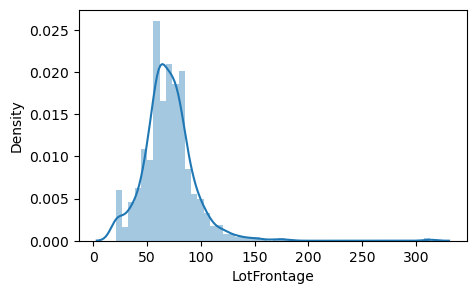

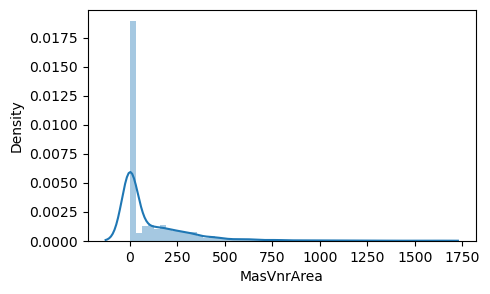

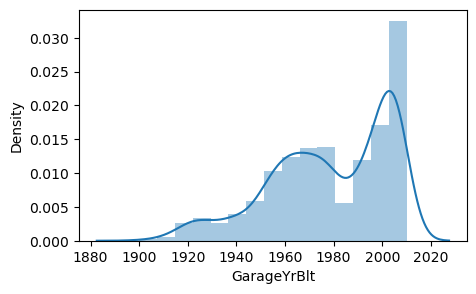

In [9]:
### before imputation plots 

plt.figure(figsize=(5, 3))
sns.distplot(SH_df['LotFrontage'])
plt.figure(figsize=(5, 3))
sns.distplot(SH_df['MasVnrArea'])
plt.figure(figsize=(5, 3))
sns.distplot(SH_df['GarageYrBlt'])

In [10]:
### Imputation of missing values through median for numeric data (except year column)

SH_df['LotFrontage']= SH_df.LotFrontage.fillna(SH_df.LotFrontage.median()) 
SH_df['MasVnrArea']= SH_df.MasVnrArea.fillna(SH_df.MasVnrArea.median())  
SH_df['GarageYrBlt']= SH_df.GarageYrBlt.fillna(SH_df.GarageYrBlt.median())  

In [11]:
SH_df['PropertyAge'] = SH_df['YrSold'] - SH_df['YearBuilt']
SH_df = SH_df.drop(['YrSold', 'YearBuilt'], axis=1)

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

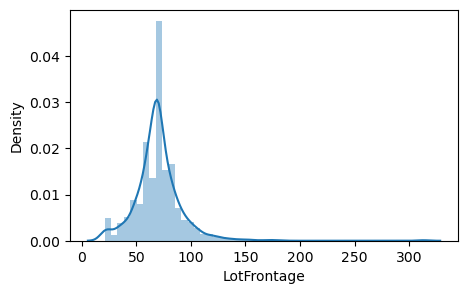

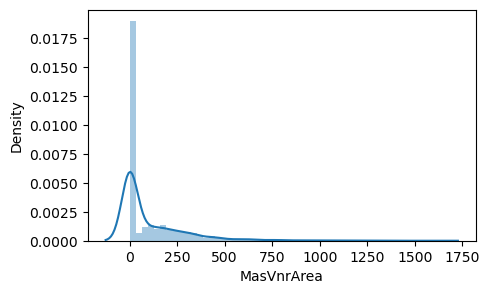

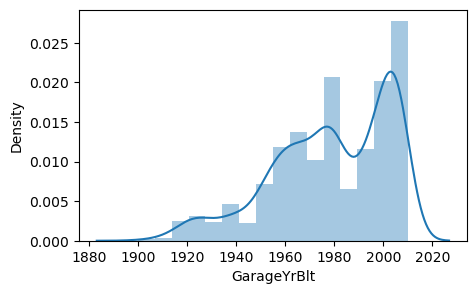

In [12]:
### after imputation plots 

plt.figure(figsize=(5, 3))
sns.distplot(SH_df['LotFrontage'])
plt.figure(figsize=(5, 3))
sns.distplot(SH_df['MasVnrArea'])
plt.figure(figsize=(5, 3))
sns.distplot(SH_df['GarageYrBlt'])

In [13]:
SH_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story            7            5          2003   
1       Norm     1Fam     1Story            6            8          1976   
2       Norm     1Fam     2Story            7            5          2002   
3       Norm     1Fam     2Story            7            5          1970   
4       Norm     1Fam     2Story            8            5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          

In [14]:
item_blanks(SH_df)

Id 	 0 	 0.0% 	 int64
MSSubClass 	 0 	 0.0% 	 int64
MSZoning 	 0 	 0.0% 	 object
LotFrontage 	 0 	 0.0% 	 float64
LotArea 	 0 	 0.0% 	 int64
Street 	 0 	 0.0% 	 object
Alley 	 1369 	 93.8% 	 object
LotShape 	 0 	 0.0% 	 object
LandContour 	 0 	 0.0% 	 object
Utilities 	 0 	 0.0% 	 object
LotConfig 	 0 	 0.0% 	 object
LandSlope 	 0 	 0.0% 	 object
Neighborhood 	 0 	 0.0% 	 object
Condition1 	 0 	 0.0% 	 object
Condition2 	 0 	 0.0% 	 object
BldgType 	 0 	 0.0% 	 object
HouseStyle 	 0 	 0.0% 	 object
OverallQual 	 0 	 0.0% 	 int64
OverallCond 	 0 	 0.0% 	 int64
YearRemodAdd 	 0 	 0.0% 	 int64
RoofStyle 	 0 	 0.0% 	 object
RoofMatl 	 0 	 0.0% 	 object
Exterior1st 	 0 	 0.0% 	 object
Exterior2nd 	 0 	 0.0% 	 object
MasVnrType 	 8 	 0.5% 	 object
MasVnrArea 	 0 	 0.0% 	 float64
ExterQual 	 0 	 0.0% 	 object
ExterCond 	 0 	 0.0% 	 object
Foundation 	 0 	 0.0% 	 object
BsmtQual 	 37 	 2.5% 	 object
BsmtCond 	 37 	 2.5% 	 object
BsmtExposure 	 38 	 2.6% 	 object
BsmtFinType1 	 37 	 2.5% 	 obje

In [15]:
MSsubclass_dict={20:'1-STORY 1946 & NEWER ALL STYLES',
                 30:'1-STORY 1945 & OLDER',
                 40:'1-STORY W/FINISHED ATTIC ALL AGES',
                 45:'1-1/2 STORY - UNFINISHED ALL AGES',
                 50:'1-1/2 STORY FINISHED ALL AGES',
                 60:'2-STORY 1946 & NEWER',
                 70:'2-STORY 1945 & OLDER',
                 75:'2-1/2 STORY ALL AGES',
                 80:'SPLIT OR MULTI-LEVEL',
                 85:'SPLIT FOYER',
                 90:'DUPLEX - ALL STYLES AND AGES',
                 120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                 150:'1-1/2 STORY PUD - ALL AGES',
                 160:'2-STORY PUD - 1946 & NEWER',
                 180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                 190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}

overall_dict={ 10:'Very Excellent',
               9:'Excellent',
               8:'Very Good',
               7:'Good',
               6:'Above Average',
               5:'Average',
               4:'Below Average',
               3:'Fair',
               2:'Poor',
               1:'Very Poor'}


In [16]:
SH_df['MSSubClass'] = SH_df['MSSubClass'].replace(MSsubclass_dict)
SH_df['OverallQual'] = SH_df['OverallQual'].replace(overall_dict)
SH_df['OverallCond'] = SH_df['OverallCond'].replace(overall_dict)
SH_df = SH_df.drop(columns = ['Id'])
SH_df.tail()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
1455             2-STORY 1946 & NEWER       RL         62.0     7917   Pave   
1456  1-STORY 1946 & NEWER ALL STYLES       RL         85.0    13175   Pave   
1457             2-STORY 1945 & OLDER       RL         66.0     9042   Pave   
1458  1-STORY 1946 & NEWER ALL STYLES       RL         68.0     9717   Pave   
1459  1-STORY 1946 & NEWER ALL STYLES       RL         75.0     9937   Pave   

     Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
1455   NaN      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
1456   NaN      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
1457   NaN      Reg         Lvl    AllPub    Inside       Gtl      Crawfor   
1458   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1459   NaN      Reg         Lvl    AllPub    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle    OverallQual    OverallCond  \
1455       Norm       Norm     1Fam     2Story  Above Average        Average   
1456       Norm       Norm     1Fam     1Story  Above Average  Above Average   
1457       Norm       Norm     1Fam     2Story           Good      Excellent   
1458       Norm       Norm     1Fam     1Story        Average  Above Average   
1459       Norm       Norm     1Fam     1Story        Average  Above Average   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3     

In [17]:
SH_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [18]:
SH_df['Electrical'].fillna('SBrkr', inplace=True) 

In [19]:
SH_df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','MasVnrType']] = SH_df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','MasVnrType']].replace(np.NaN,"No Item")

In [20]:
item_blanks(SH_df)

MSSubClass 	 0 	 0.0% 	 object
MSZoning 	 0 	 0.0% 	 object
LotFrontage 	 0 	 0.0% 	 float64
LotArea 	 0 	 0.0% 	 int64
Street 	 0 	 0.0% 	 object
Alley 	 0 	 0.0% 	 object
LotShape 	 0 	 0.0% 	 object
LandContour 	 0 	 0.0% 	 object
Utilities 	 0 	 0.0% 	 object
LotConfig 	 0 	 0.0% 	 object
LandSlope 	 0 	 0.0% 	 object
Neighborhood 	 0 	 0.0% 	 object
Condition1 	 0 	 0.0% 	 object
Condition2 	 0 	 0.0% 	 object
BldgType 	 0 	 0.0% 	 object
HouseStyle 	 0 	 0.0% 	 object
OverallQual 	 0 	 0.0% 	 object
OverallCond 	 0 	 0.0% 	 object
YearRemodAdd 	 0 	 0.0% 	 int64
RoofStyle 	 0 	 0.0% 	 object
RoofMatl 	 0 	 0.0% 	 object
Exterior1st 	 0 	 0.0% 	 object
Exterior2nd 	 0 	 0.0% 	 object
MasVnrType 	 0 	 0.0% 	 object
MasVnrArea 	 0 	 0.0% 	 float64
ExterQual 	 0 	 0.0% 	 object
ExterCond 	 0 	 0.0% 	 object
Foundation 	 0 	 0.0% 	 object
BsmtQual 	 0 	 0.0% 	 object
BsmtCond 	 0 	 0.0% 	 object
BsmtExposure 	 0 	 0.0% 	 object
BsmtFinType1 	 0 	 0.0% 	 object
BsmtFinSF1 	 0 	 0.0% 	 

### <font color= Orange> OBSERVATION:

1. No major changes seen in the histograms of imputed variables
2. As majority of NA implies unaivialability of the variable imputation of NA is done with no item
3. 'MSSubClass', OverallQual, OverallCond are not numeric but encoded classes hence imputed the original values
4. Since majority of Electrical fittings are 'standard circuti breaker and Romex' the missing value is imputer with 'SBrkr'
5. Outliers needs to be removed

In [21]:
# all numeric (float and int) variables in the dataset
SH_numerical_df = SH_df.select_dtypes(include=['int64', 'float64'])
SH_numerical_df.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0             8           0       2003.0           2         548           0   
1             6           1       1976.0           2         460         298   
2             6           1       2001.0           2         608           0   
3             7           1       1998.0           3         642           0   
4             9           1       2000.0           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  SalePrice  PropertyAge  
0       2     208500            5  
1       5     181500           31  
2       9     223500            7  
3       2     140000           91  
4      12     250000            8

In [22]:
for col in SH_numerical_df.columns:
        Q1 = SH_df[col].quantile(.25)
        Q3 = SH_df[col].quantile(.98) ##98 percentil is selected for outliers treatment
        IQR = Q3-Q1
        SH_df =  SH_df[(SH_df[col] >= (Q1-(1.5*IQR))) & (SH_df[col] <= (Q3+(1.5*IQR)))] 

In [23]:
SH_df.shape

(1385, 79)

### <font color= Orange> OBSERVATION:

1. Outliers from numerical columns have been dropped
2. Shape has been changed from 1460 to 1385 rows (this is not a mandatory requiremnt as high value propeties may also be removed)

#### 2.1 Numeriacal data analysis

In [24]:
SH_numerical_df = SH_df.select_dtypes(include=['int64', 'float64'])

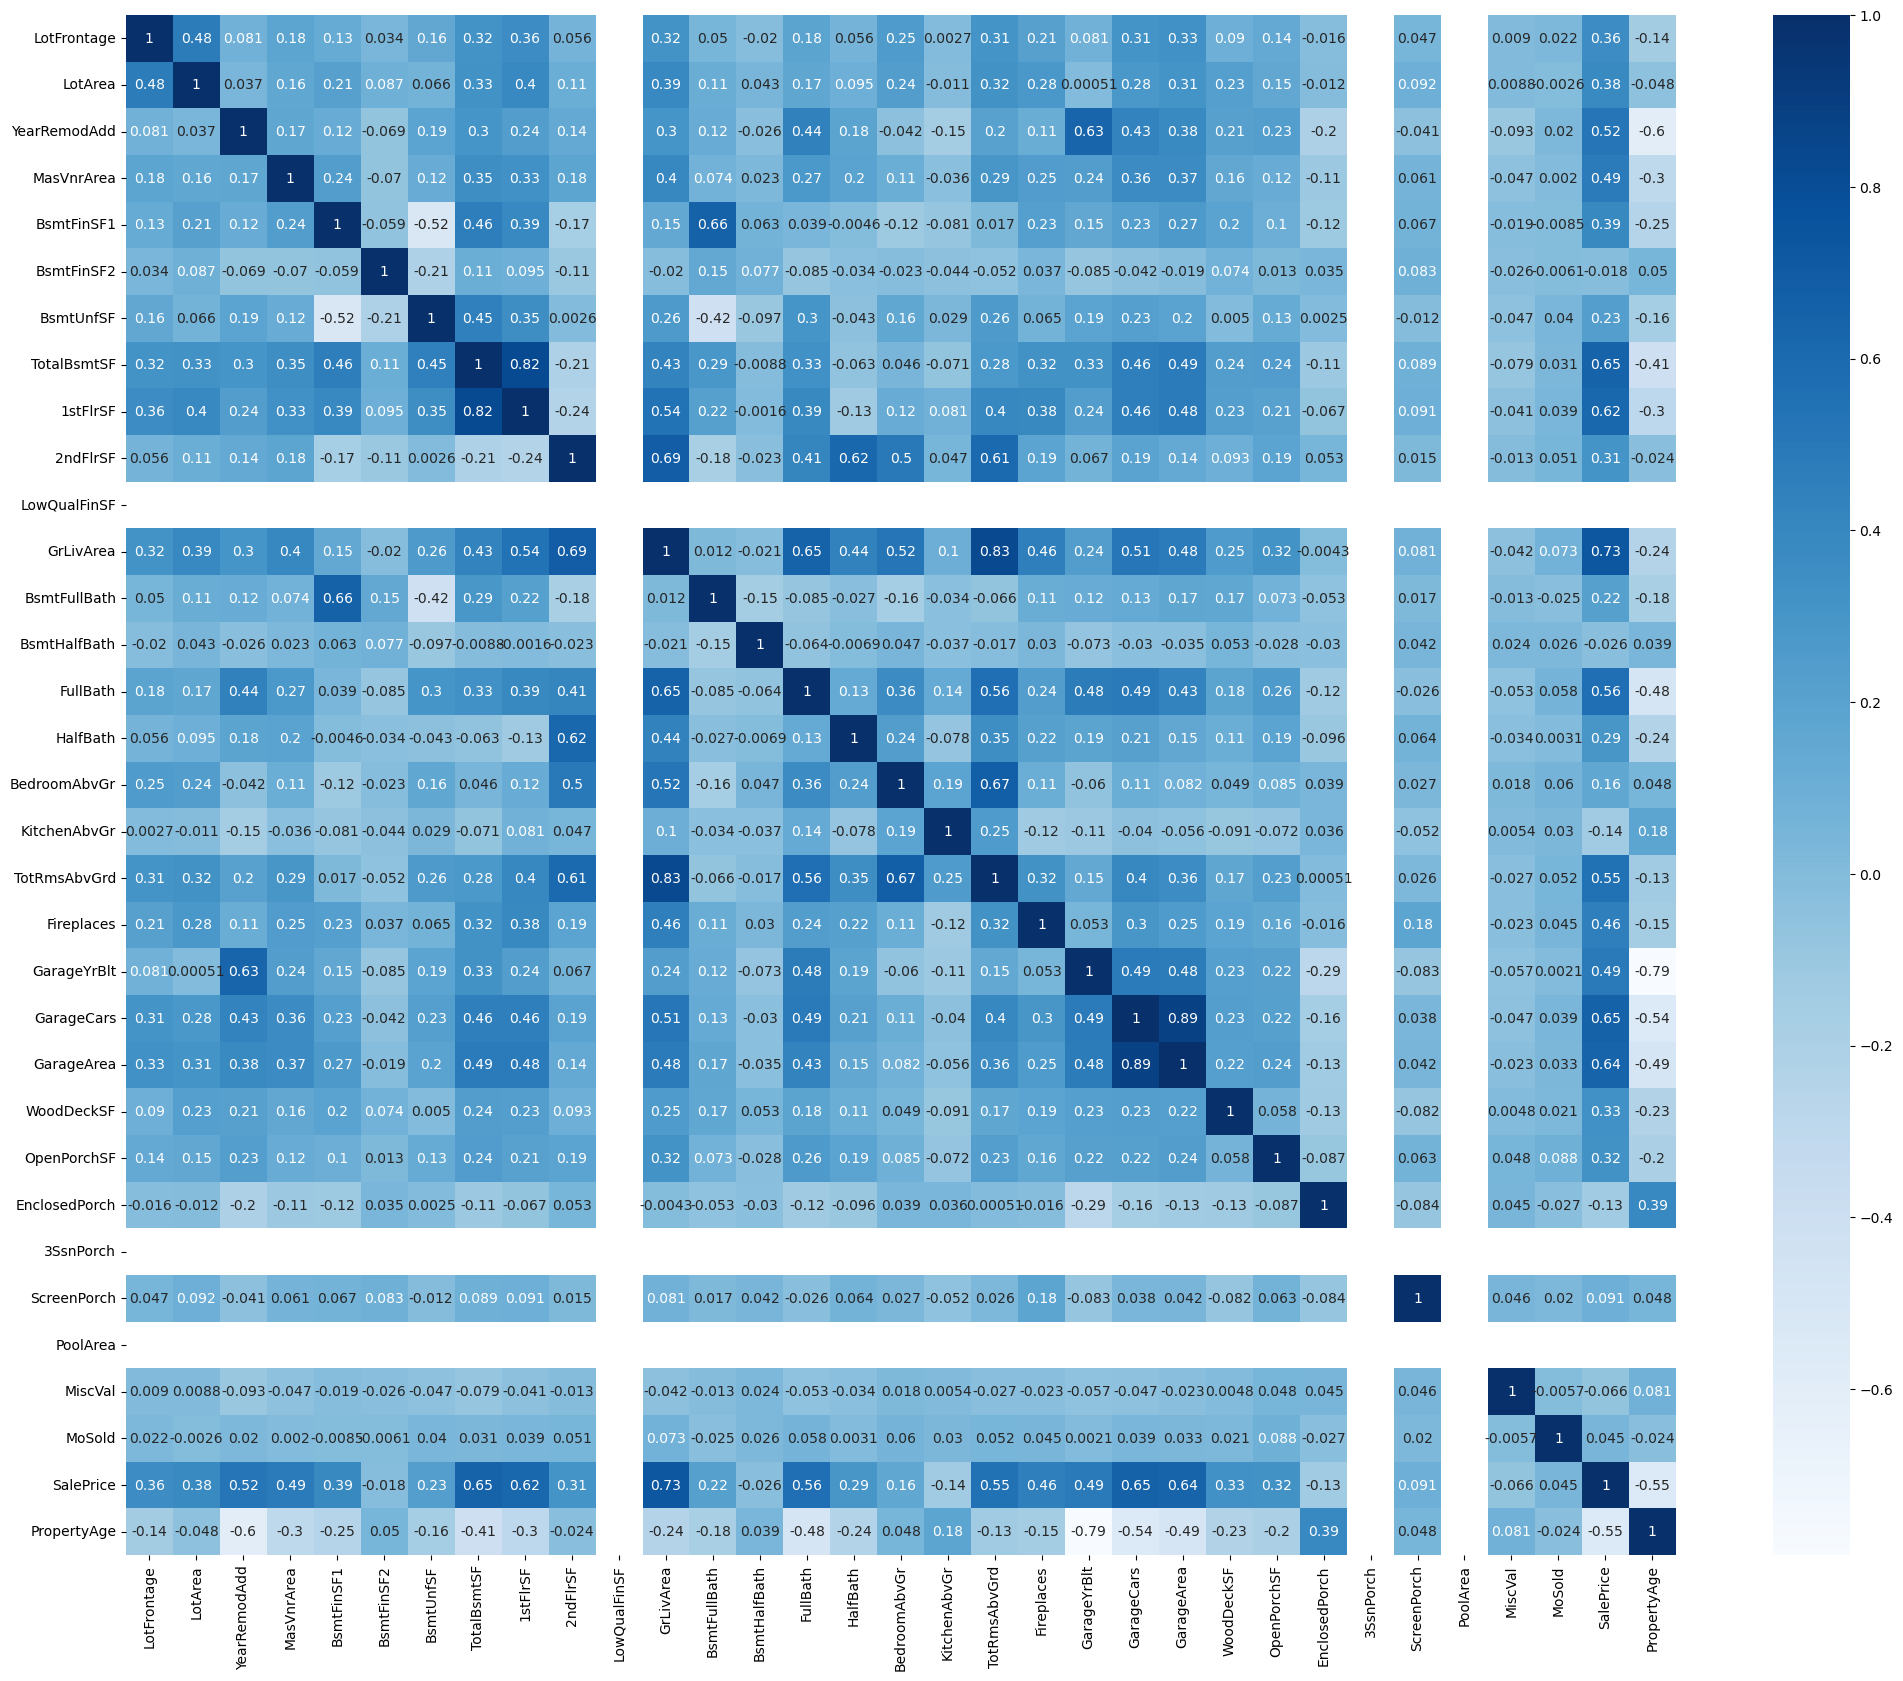

In [25]:
# plotting heatmap

plt.figure(figsize=(25,20))
sns.heatmap(SH_numerical_df.corr(), cmap="Blues", annot=True)
plt.show()


<Figure size 2000x1200 with 0 Axes>

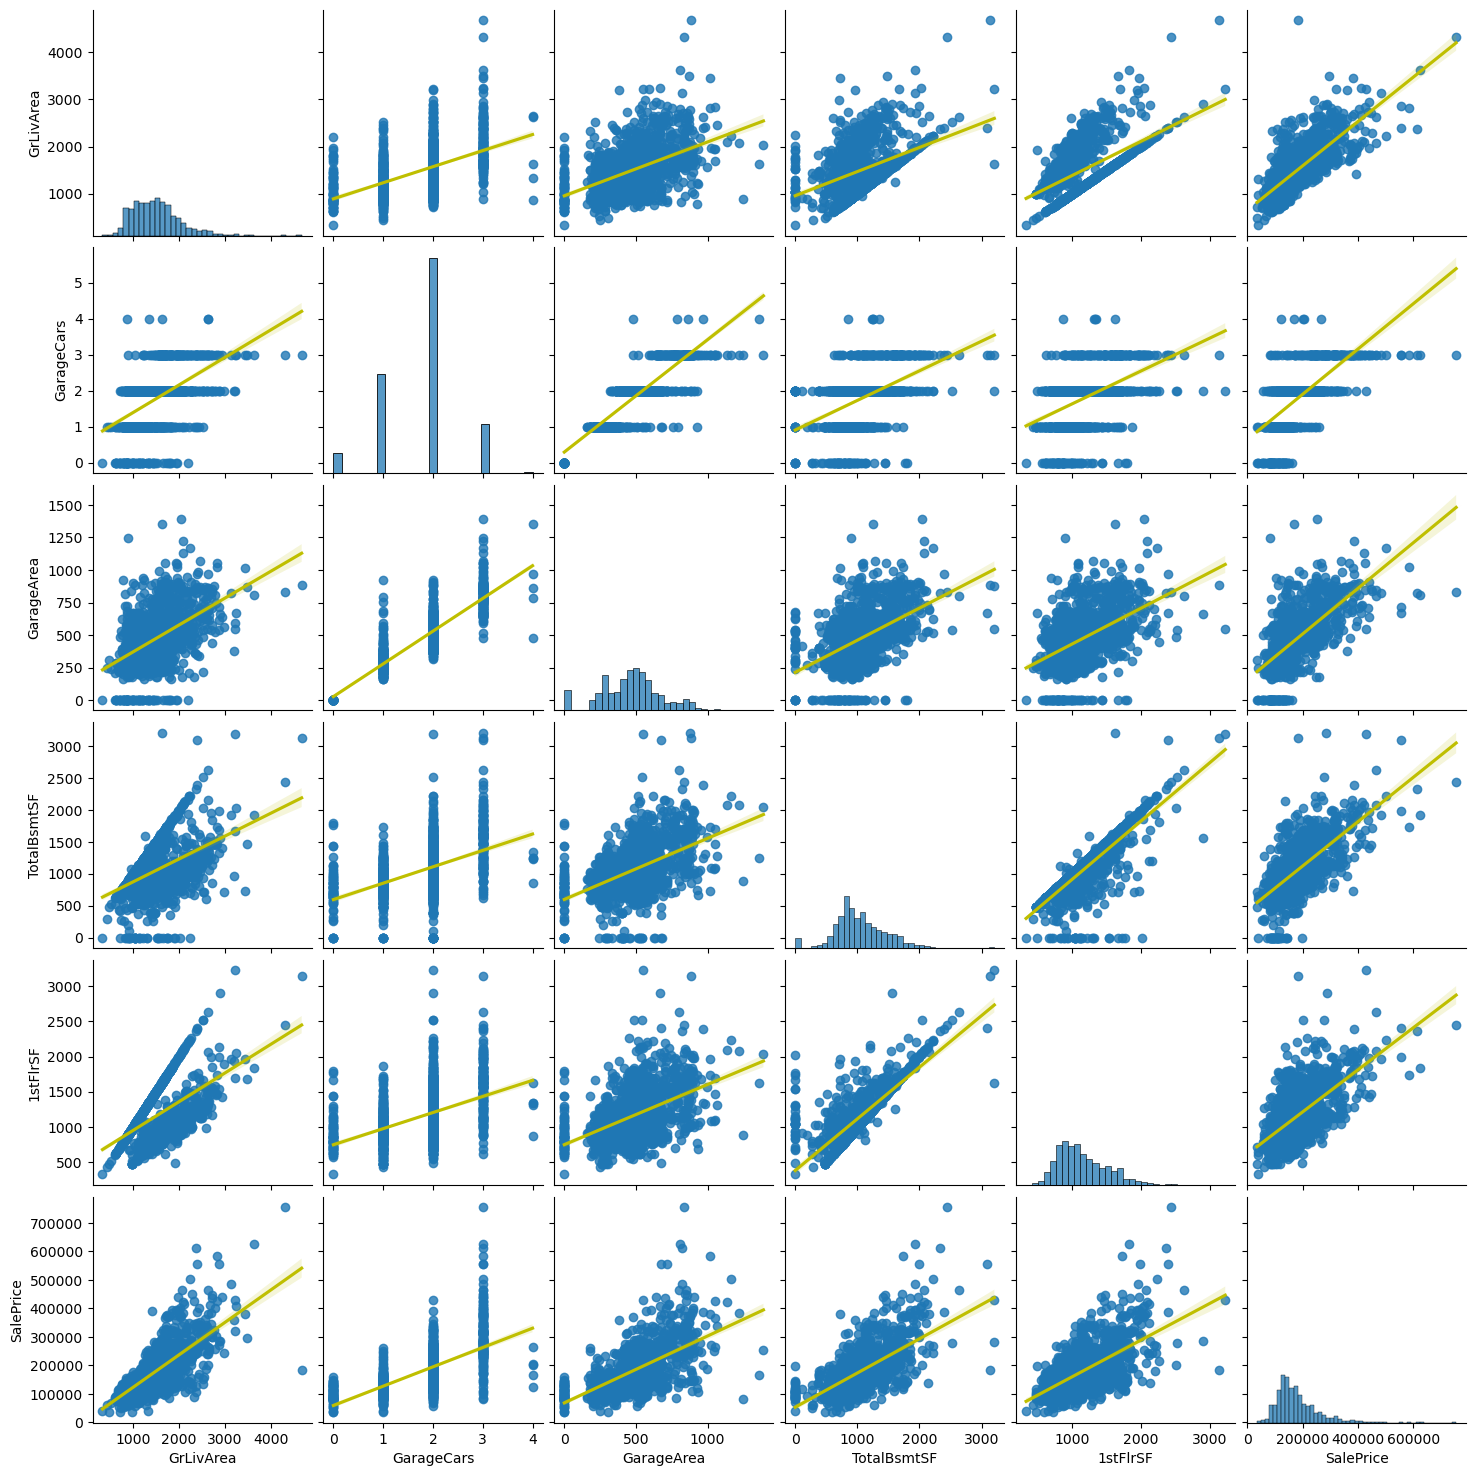

In [26]:
plt.figure(figsize=(20,12))
sns.pairplot(SH_df[['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','SalePrice']],kind='reg',plot_kws={'line_kws':{'color':'y'}})
plt.show()

### <font color= Orange> OBSERVATION:

1.from numerical varialbes top 5 correlations for price comes from
    
    a. GrLivArea
    b. GarageCars
    c. GarageArea
    d. TotalbsmntSF
    e. 1stFlrSF
    
  i.e Higher the rise in variables mentioned higher the salesprice (barring few outliers)
    
2.These variables are analysed further and they show a strong positive trend and hence governs rise in price.
    
3.Negetive correlations are also observed (weak)
    
4.Some columns have 0 as entries or same entries

#### 2.1 categorical data analysis

In [27]:
SH_categorical_df = SH_df.select_dtypes(include='object')

In [28]:
SH_categorical_df.shape

(1385, 46)

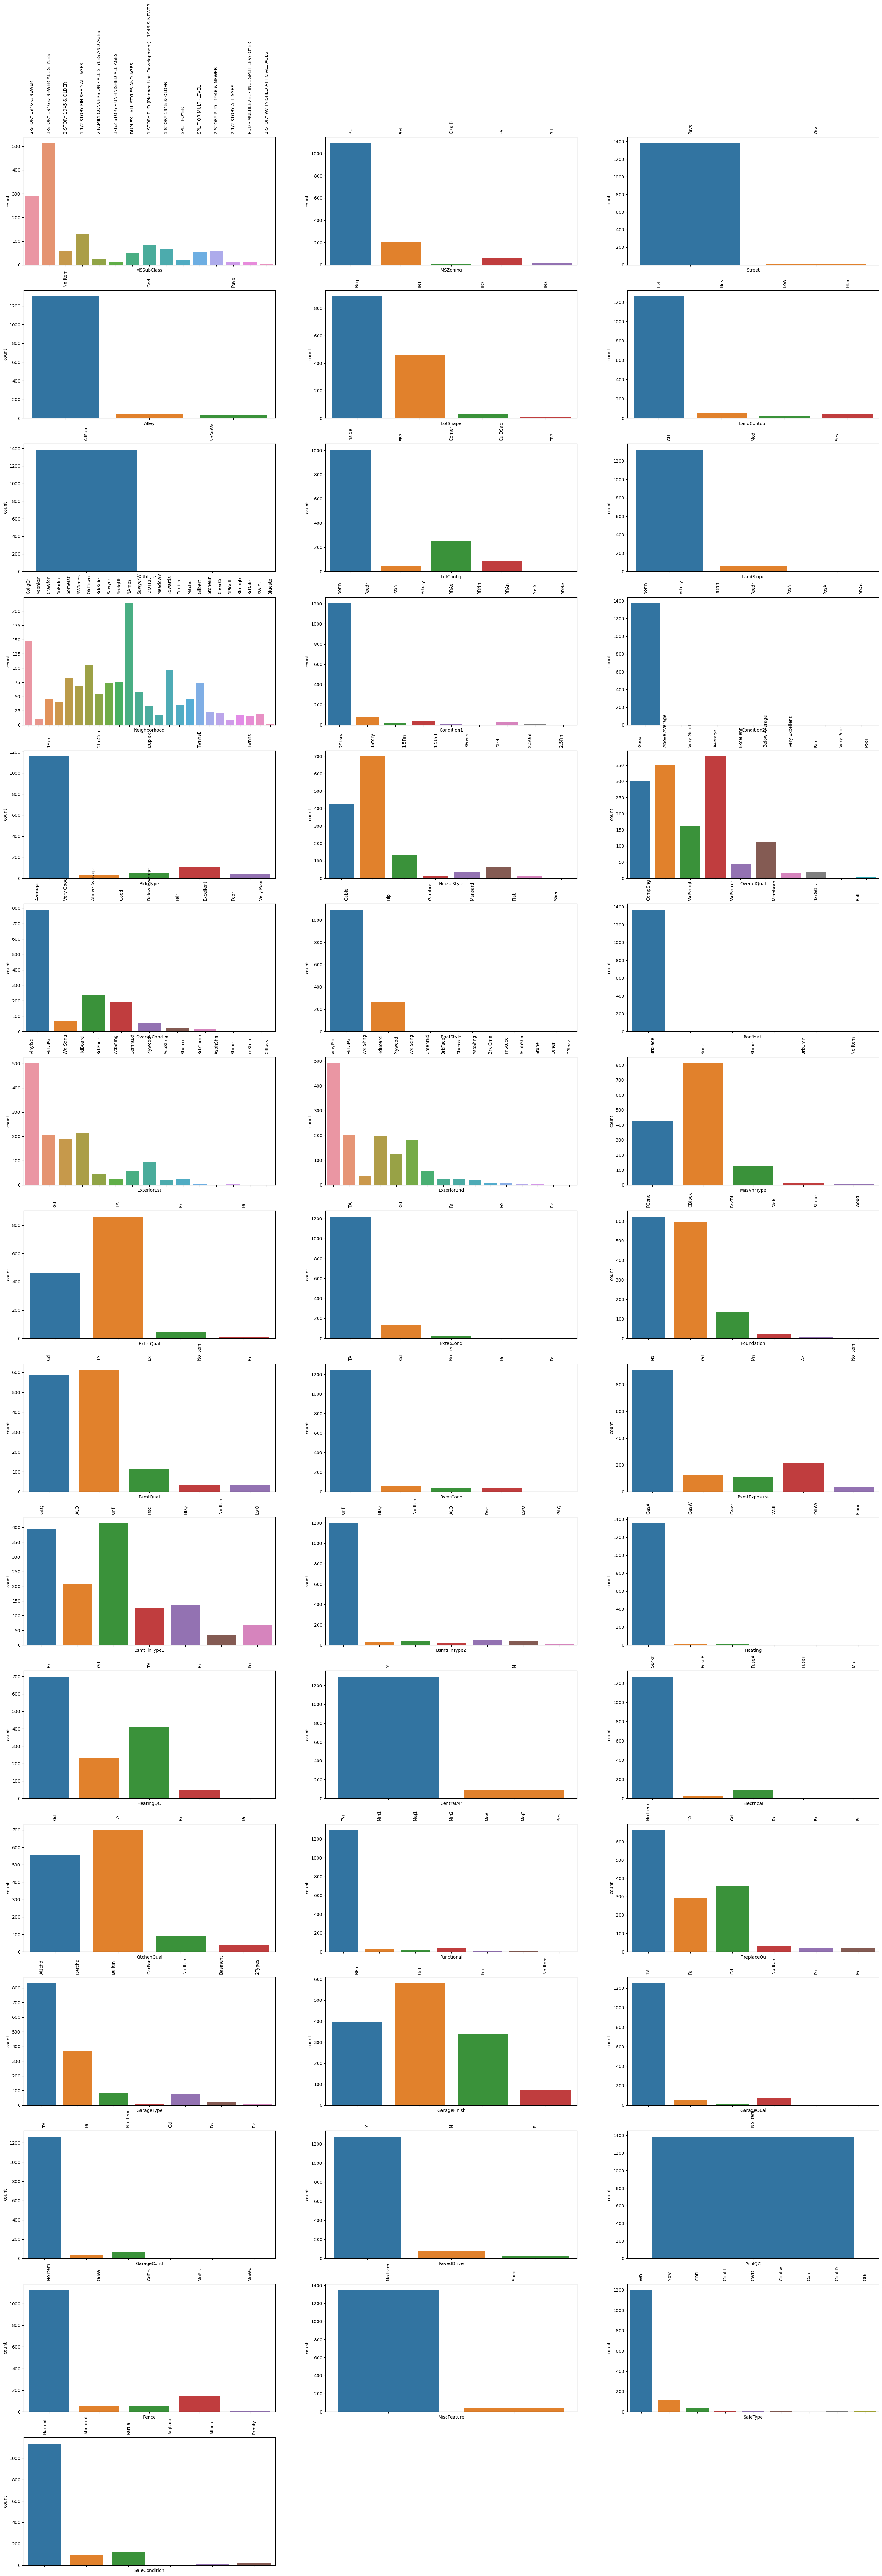

In [29]:
plt.figure(figsize=(35, 100))
for i in range (0,len(SH_categorical_df.columns)):
    plt.subplot(16,3,i+1)
    grp= sns.countplot(x = SH_categorical_df.columns[i], data = SH_df)
    grp.tick_params(axis='x', labelbottom=False,labeltop=True, labelrotation=90)
plt.show()

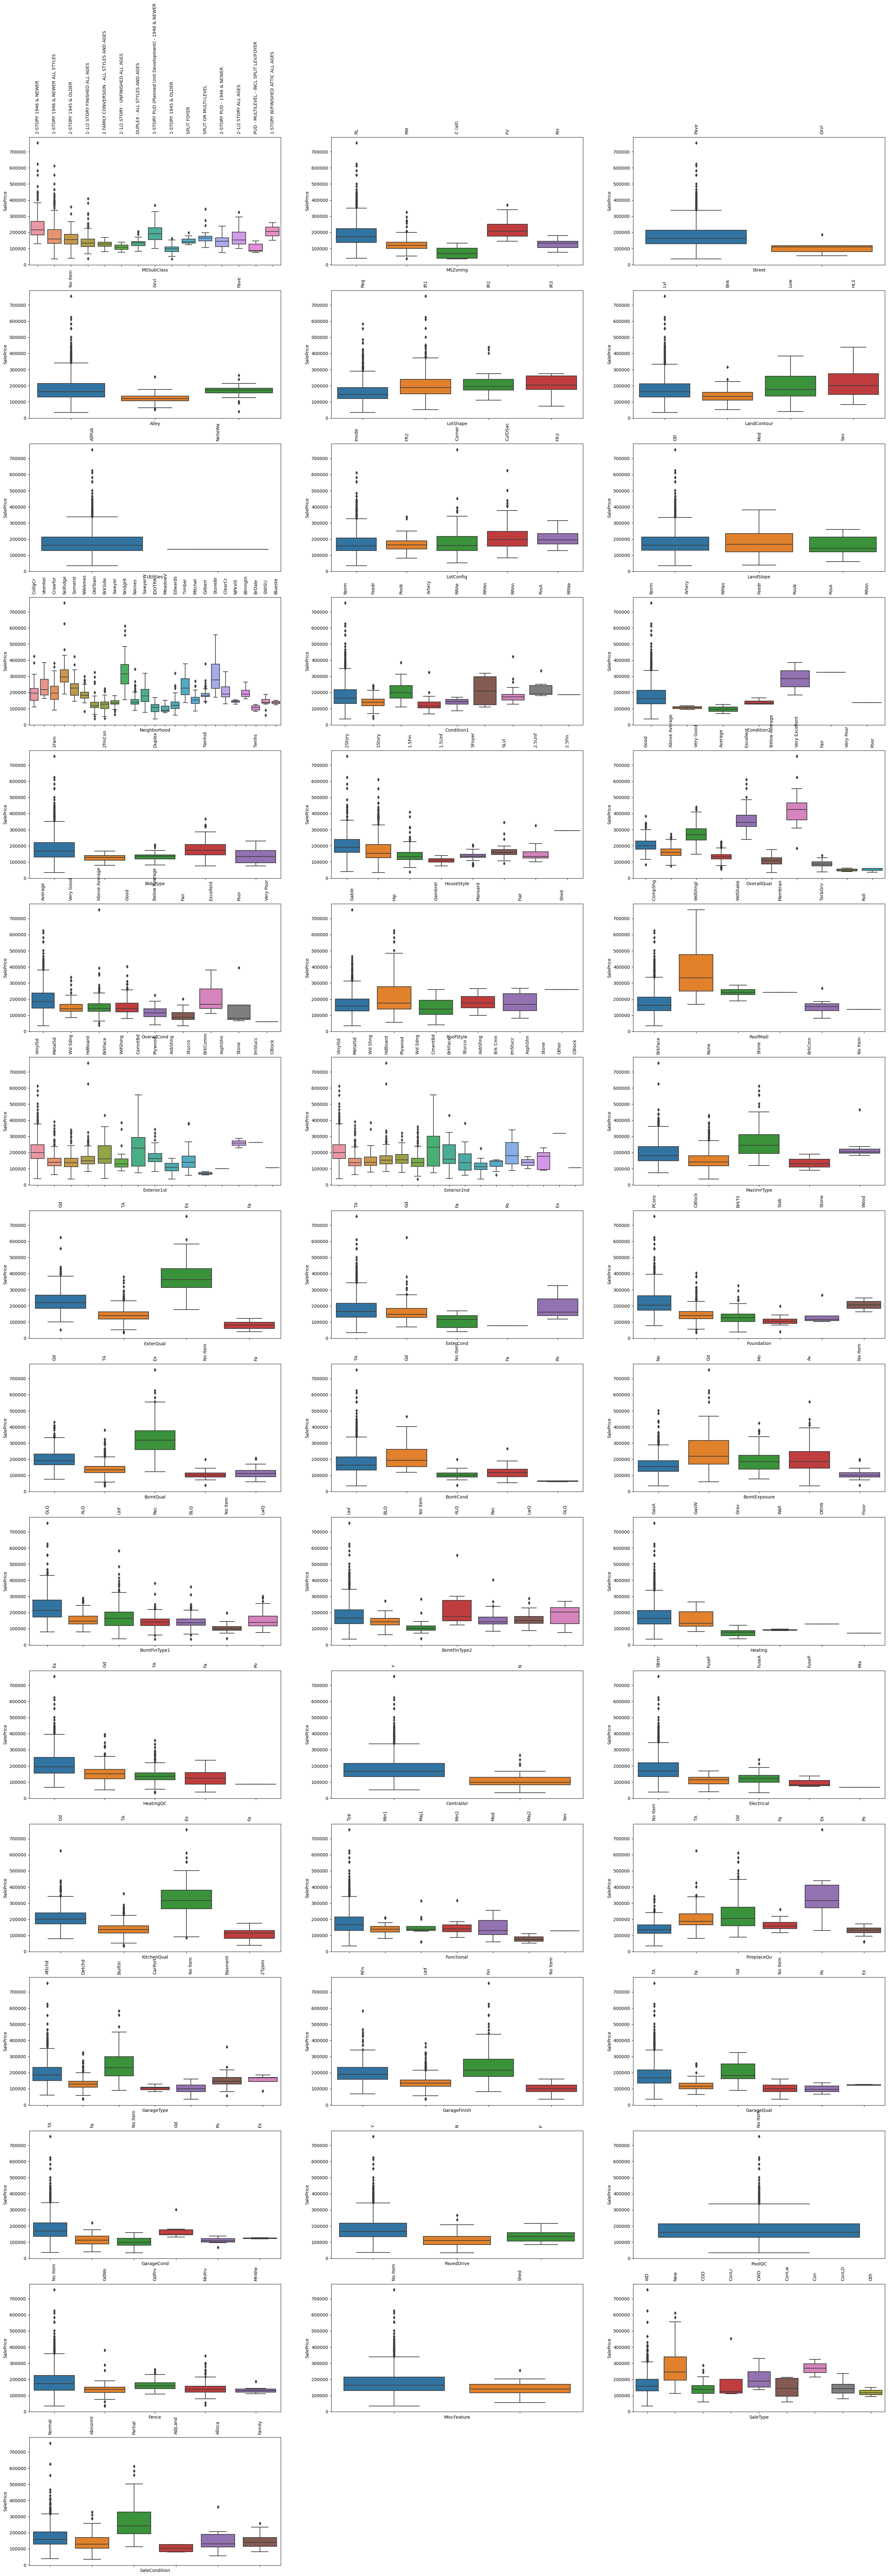

In [30]:
plt.figure(figsize=(35, 100))
for i in range (0,len(SH_categorical_df.columns)):
    plt.subplot(16,3,i+1)
    grp= sns.boxplot(x = SH_categorical_df.columns[i], y=SH_df.SalePrice, data = SH_df)
    grp.tick_params(axis='x', labelbottom=False,labeltop=True, labelrotation=90)
plt.show()

### <font color= Orange> OBSERVATIONS: 

Insights from count plots
    
1. some of the counts are skewed towards one item highly these columns will be dropped (given in point 2)
2. Functional,GarageQual,GarageCond,SaleType,CentralAir,Heating,ExterCond,Utilities,Street,Condition1,Condition2,RoofMatl,LandSlope,LandContour,Electrical,BsmtFinType2,PavedDrive,BsmtCond
      
    
Insights from box plots
    
MSSubclass: Below mwntioned sale for a better price comparitively
    
    1. 1-STORY 1946 & NEWER ALL STYLES
    2. 2-STORY 1946 & NEWER
    3. 1-1/2 STORY PUD - ALL AGES
    
Street: Paved street goes for a better price
    
Lotshape: Irregularly shaped properties (slight and moderate) sale better
    
LotConfig: Corner and CulDsac properties get higher price comparitively

physical location within limits properties from Northridge Heights , Northridge and stone brook sell at higher price

properties Within 200' of East-West Railroad are sold for higher price followed by Near positive off-site feature--park, greenbelt, etc

2 storey house style are sold at higher price

properties rated excellent or very excellent for overall material and construction are sold better

Stone masonry are sold better

pool quality, New property , partial, Garage fnish and quality (excellent) builtin garages, Excellent kithen quality and fireplace properties give maximum salepirce

In [31]:
# dropping said items from categorical df
SH_categorical_df.drop(['Functional','GarageQual','GarageCond','SaleType','CentralAir','Heating','ExterCond','Utilities','Street','Condition1','Condition2','RoofMatl','LandSlope','LandContour','Electrical'],axis=1,inplace=True)

In [32]:
SH_categorical_df.shape

(1385, 31)

In [33]:
# One hot encoding of categorical data
SH_categorical_encod_df = pd.get_dummies(SH_categorical_df , drop_first=True)
SH_categorical_encod_df.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   MSSubClass_DUPLEX - ALL STYLES AND AGES  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  MSSubClass_SPLIT FOYER  \
0                                                  0                        0   
1                                                  0                        0   
2                                                  0                        0   
3                                                  0                        0   
4                                                  0                        0   

   MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0                                0            0            0            1   
1                                0            0            0            1   
2                                0            0            0            1   
3                                0            0            0            1   
4                                0            0            0            1   

   MSZoning_RM  Alley

In [34]:
SH_categorical_encod_df.shape

(1385, 182)

In [35]:
# concatenating encoded df and numeric df
SH_df2 = pd.concat([SH_numerical_df, SH_categorical_encod_df], axis=1)
SH_df2.shape

(1385, 215)

In [36]:
SH_df2.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0             8           0       2003.0           2         548           0   
1             6           1       1976.0           2         460         298   
2             6           1       2001.0           2         608           0   
3             7           1       1998.0           3         642           0   
4             9           1       2000.0           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  SalePrice  PropertyAge  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
0       2     208500            5                                         0   
1       5     181500           31                                         0   
2       9     223500            7                                         0   
3       2     140000           91                                         0   
4      12     250000            8                                         0   

   MSSubClass_1-STORY 1945 & OLDER  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                       

<Axes: xlabel='SalePrice', ylabel='Density'>

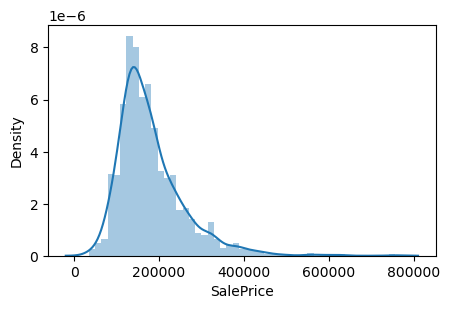

In [37]:
plt.figure(figsize=(5, 3))
sns.distplot(SH_df2['SalePrice'])

### <font color= Orange> OBSERVATIONS: 

1. Salesprice has a huge variation in hundred thousand units this will cause problems during interpretation stage if the scale is not similar to the other variable items. 
2. Converting it to log scale 

<Axes: xlabel='SalePrice', ylabel='Density'>

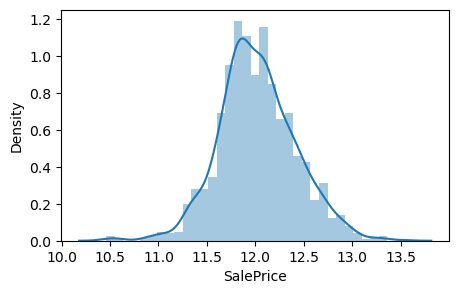

In [38]:
#Tranforming to form normal disribution
SH_df2['SalePrice']=np.log(SH_df2.SalePrice) 
plt.figure(figsize=(5, 3))
sns.distplot(SH_df2['SalePrice'])

#### 3. Model building and Evaluation

In [39]:
## Train Test Split
X = SH_df2.drop(['SalePrice'], axis=1)
y = SH_df2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 100)

In [40]:
print("X Train: ",X_train.shape)
print("X Test: ",X_test.shape)
print("y Train: ",y_train.shape)
print("y Test: ",y_test.shape)

X Train:  (969, 214)
X Test:  (416, 214)
y Train:  (969,)
y Test:  (416,)


In [41]:
scaler = StandardScaler() # standardising of data

In [42]:
X_train.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
567          70.0    10171          2004       168.0           2           0   
1039         21.0     1477          1970         0.0         509           0   
516          69.0    10448          1972       333.0           0           0   
529          69.0    32668          1975         0.0        1219           0   
1075         75.0    13125          1984         0.0         410           0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
567        1515         1517      1535         0             0       1535   
1039        121          630       630         0             0        630   
516         689          689      1378       741             0       2119   
529         816         2035      2515         0             0       2515   
1075        390          800       960       780             0       1740   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
567              0             0         2         0             3   
1039             1             0         1         0             1   
516              0             0         2         1             3   
529              1             0         3         0             4   
1075             0             0         1         1             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
567              1             7           0       2004.0           2   
1039             1             3           0       1970.0           1   
516              1             7           1       1972.0           2   
529              2             9           2       1975.0           2   
1075             1             6           2       1940.0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
567          532           0            0              0          0   
1039         286           0            0              0          0   
516          583           0          104              0          0   
529          484           0            0            200          0   
1075         240           0            0              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  PropertyAge  \
567             0         0        0       3            6   
1039            0         0        0       4           39   
516             0         0        0       8           37   
529             0         0        0       3           50   
1075            0         0        0       7           67   

      MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
567                                          0   
1039                                         0   
516                                          0   
529                                          0   
1075                                         0   

      MSSubClass_1-STORY 1945 & OLDER  \
567                                 0   
1039                                0   
516                                 0   
529                                 0   
1075                                0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
567                                            1   
1039                                           0   
516                                            0   
529                                            1   
1075                                           0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
567                                                   0                  
1039                                                  0                  
516                                                   0                  
529                                                   0                  
1075                                                  0                  

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
567                                             

In [43]:
def create_categ_lists(df_name):
    numerical_item=[]
    categ_item=[]
    for i in df_name.columns:
        if df_name[i].dtype == 'float64' or df_name[i].dtype == 'int64' and df_name[i].nunique() > 2:
            numerical_item.append(i)
        else:
            categ_item.append(i)
    return numerical_item, categ_item

numerical_item, categ_item= create_categ_lists(X_train)

In [44]:
numerical_item

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'PropertyAge']

In [45]:
X_train[numerical_item]= scaler.fit_transform(X_train[numerical_item])

In [46]:
X_train.describe()

LotFrontage       LotArea  YearRemodAdd    MasVnrArea  BsmtFinSF1  \
count  9.690000e+02  9.690000e+02  9.690000e+02  9.690000e+02  969.000000   
mean   3.336398e-16 -9.165928e-18 -4.725952e-15  3.391393e-17    0.000000   
std    1.000516e+00  1.000516e+00  1.000516e+00  1.000516e+00    1.000516   
min   -2.453792e+00 -1.792063e+00 -1.710703e+00 -5.968707e-01   -0.996907   
25%   -4.677292e-01 -4.913418e-01 -8.841040e-01 -5.968707e-01   -0.996907   
50%   -9.407138e-03 -8.665922e-02  4.287295e-01 -5.968707e-01   -0.124015   
75%    4.998396e-01  3.234275e-01  9.149641e-01  3.591722e-01    0.637493   
max    5.032136e+00  7.621225e+00  1.206705e+00  8.144093e+00    4.140427   

         BsmtFinSF2     BsmtUnfSF   TotalBsmtSF      1stFlrSF      2ndFlrSF  \
count  9.690000e+02  9.690000e+02  9.690000e+02  9.690000e+02  9.690000e+02   
mean   5.499557e-18  1.301562e-16 -1.613203e-16  2.988093e-16 -9.165928e-17   
std    1.000516e+00  1.000516e+00  1.000516e+00  1.000516e+00  1.000516e+00   
min   -2.785212e-01 -1.276040e+00 -2.436091e+00 -2.185006e+00 -7.848777e-01   
25%   -2.785212e-01 -7.790501e-01 -6.048204e-01 -7.407127e-01 -7.848777e-01   
50%   -2.785212e-01 -2.110611e-01 -1.516040e-01 -1.971333e-01 -7.848777e-01   
75%   -2.785212e-01  5.322057e-01  5.592787e-01  5.880369e-01  9.063714e-01   
max    8.801491e+00  3.906859e+00  4.939604e+00  5.414601e+00  3.505120e+00   

       LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath  \
count         969.0  9.690000e+02  9.690000e+02  9.690000e+02  9.690000e+02   
mean            0.0  1.833186e-16 -1.833186e-17  4.399645e-17 -1.539876e-16   
std             0.0  1.000516e+00  1.000516e+00  1.000516e+00  1.000516e+00   
min             0.0 -2.325984e+00 -8.270748e-01 -2.435470e-01 -2.882516e+00   
25%             0.0 -7.536270e-01 -8.270748e-01 -2.435470e-01 -1.055728e+00   
50%             0.0 -9.814839e-02 -8.270748e-01 -2.435470e-01  7.710588e-01   
75%             0.0  5.355469e-01  1.132425e+00 -2.435470e-01  7.710588e-01   
max             0.0  6.272470e+00  3.091925e+00  7.894283e+00  2.597846e+00   

           HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd    Fireplaces  \
count  9.690000e+02  9.690000e+02  9.690000e+02  9.690000e+02  9.690000e+02   
mean  -2.933097e-17  1.209902e-16 -4.216327e-16 -2.199823e-16 -3.941349e-17   
std    1.000516e+00  1.000516e+00  1.000516e+00  1.000516e+00  1.000516e+00   
min   -7.659058e-01 -3.606414e+00 -4.657751e+00 -2.849582e+00 -9.636542e-01   
25%   -7.659058e-01 -1.075918e+00 -2.067049e-01 -9.574542e-01 -9.636542e-01   
50%   -7.659058e-01  1.893302e-01 -2.067049e-01 -3.267451e-01  6.298286e-01   
75%    1.250841e+00  1.893302e-01 -2.067049e-01  3.039641e-01  6.298286e-01   
max    3.267587e+00  3.985075e+00  8.695387e+00  3.457510e+00  3.816794e+00   

        GarageYrBlt    GarageCars    GarageArea    WoodDeckSF   OpenPorchSF  \
count  9.690000e+02  9.690000e+02  9.690000e+02  9.690000e+02  9.690000e+02   
mean  -4.113668e-15 -5.407897e-17  9.349247e-17  4.262157e-17  3.666371e-18   
std    1.000516e+00  1.000516e+00  1.000516e+00  1.000516e+00  1.000516e+00   
min   -3.245034e+00 -2.411774e+00 -2.246366e+00 -7.530883e-01 -7.196095e-01   
25%   -6.921957e-01 -1.066346e+00 -6.554827e-01 -7.530883e-01 -7.196095e-01   
50%    4.895085e-02  2.790827e-01  1.287679e-02 -7.530883e-01 -3.365020e-01   
75%    9.547966e-01  2.790827e-01  4.647254e-01  6.031455e-01  3.530915e-01   
max    1.284195e+00  2.969940e+00  4.296026e+00  5.188507e+00  7.662782e+00   

       EnclosedPorch  3SsnPorch   ScreenPorch  PoolArea       MiscVal  \
count   9.690000e+02      969.0  9.690000e+02     969.0  9.690000e+02   
mean    1.466548e-17        0.0  1.099911e-17       0.0 -1.787356e-17   
std     1.000516e+00        0.0  1.000516e+00       0.0  1.000516e+00   
min    -3.544806e-01        0.0 -2.728897e-01       0.0 -1.685500e-01   
25%    -3.544806e-01        0.0 -2.728897e-01       0.0 -1.685500e-01   
50%    -3.544806e-01        

#### 3.1 RIDGE REGRESSION

In [47]:


# list of alphas 
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100, 1000 ]}


ridge = Ridge()

# cross validation
fold = 5
model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = fold, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)            
model_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0,
                                   10.0, 100, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [48]:
cross_vali_result = pd.DataFrame(model_ridge.cv_results_)
cross_vali_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.084640  0.000000e+00         0.000000        0.000000      0.0001   
1       0.081514  6.251144e-03         0.000000        0.000000       0.001   
2       0.043230  3.381067e-02         0.000000        0.000000        0.01   
3       0.015623  1.635211e-06         0.003907        0.003190         0.1   
4       0.013287  6.018805e-03         0.003128        0.006256         0.5   
5       0.015633  7.592050e-06         0.003125        0.006250         1.0   
6       0.012500  6.249809e-03         0.003125        0.006250         5.0   
7       0.012501  6.250405e-03         0.009376        0.007655        10.0   
8       0.015627  1.907349e-07         0.006250        0.007654         100   
9       0.013280  8.768023e-03         0.003124        0.006248        1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.923407           0.848620           0.821913   
1   {'alpha': 0.001}           0.923468           0.848662           0.822276   
2    {'alpha': 0.01}           0.923975           0.849055           0.825466   
3     {'alpha': 0.1}           0.926023           0.851613           0.840133   
4     {'alpha': 0.5}           0.929158           0.854557           0.853598   
5     {'alpha': 1.0}           0.931791           0.854906           0.858689   
6     {'alpha': 5.0}           0.937554           0.851552           0.870732   
7    {'alpha': 10.0}           0.935274           0.846849           0.874359   
8     {'alpha': 100}           0.901584           0.817236           0.864506   
9    {'alpha': 1000}           0.846206           0.798185           0.826572   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.905358           0.901905         0.880240        0.038381   
1           0.905430           0.901882         0.880344        0.038285   
2           0.906043           0.901665         0.881241        0.037431   
3           0.908393           0.900262         0.885285        0.033438   
4           0.908888           0.900847         0.889410        0.030290   
5           0.908253           0.902943         0.891317        0.029834   
6           0.907137           0.907988         0.894993        0.030343   
7           0.906243           0.907115         0.893968        0.030445   
8           0.891626           0.883906         0.871771        0.029857   
9           0.843331           0.828262         0.828511        0.017066   

   rank_test_score  split0_train_score  split1_train_score  \
0                8            0.941732            0.956312   
1                7            0.941732            0.956311   
2                6            0.941712            0.956307   
3                5            0.941224            0.956010   
4                4            0.939310            0.954017   
5                3            0.937539            0.952219   
6                1            0.929427            0.945511   
7                2            0.923181            0.940387   
8                9            0.887388            0.907765   
9               10            0.833173            0.851089   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.951374            0.941268            0.945522   
1            0.951374            0.941268            0.945522   
2            0.951355            0.941258            0.945511   
3            0.950849            0.940956            0.945135   
4            0.948948            0.939602            0.943471   
5            0.947347            0.938489            0.941903   
6            0.940456            0.933425            0.934637   
7            0.934790            0.928418            0.928836   
8            0.897376            0.890870            0.892447   
9            0.842216            0.830036            0.836040   

   me

Best alpha score is {'alpha': 5.0}


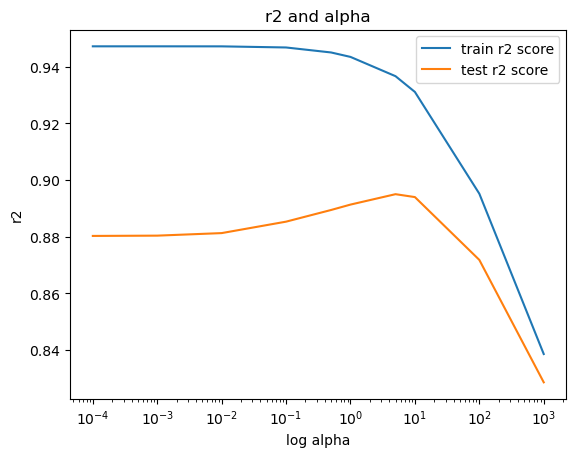

In [49]:
# plot of mean test & mean train scoes with log alpha 
best_alpha=model_ridge.best_params_
print("Best alpha score is", best_alpha)

plt.plot(cross_vali_result['param_alpha'], cross_vali_result['mean_train_score'])
plt.plot(cross_vali_result['param_alpha'], cross_vali_result['mean_test_score'])
plt.xscale('log')
plt.xlabel('log alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train r2 score', 'test r2 score'])
plt.show()

In [50]:
ridge = Ridge(alpha=best_alpha['alpha'])
ridge.fit(X_train, y_train)

Ridge(alpha=5.0)

In [51]:
Ridge_Train_score= ridge.score(X_train,y_train)

In [52]:
X_test[numerical_item] = scaler.transform(X_test[numerical_item])

In [53]:
Ridge_Test_score=ridge.score(X_test,y_test)

In [54]:
print ("Ridge R2 train score =", Ridge_Train_score)
print ("Ridge R2 test score =", Ridge_Test_score)

Ridge R2 train score = 0.9340524921755614
Ridge R2 test score = 0.8919344163584713


In [55]:
Ridge_Metric= [Ridge_Train_score,Ridge_Test_score]

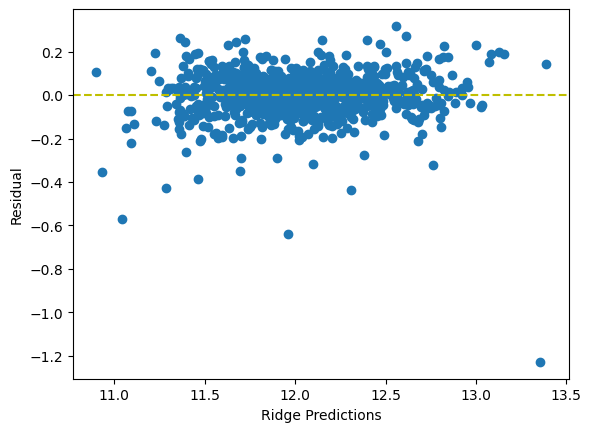

In [56]:
#Residual Analysis
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

Residulas = y_train - y_pred_train
plt.scatter( y_pred_train , Residulas)
plt.axhline(y=0, color='y', linestyle='--')
plt.xlabel("Ridge Predictions")
plt.ylabel("Residual")
plt.show()

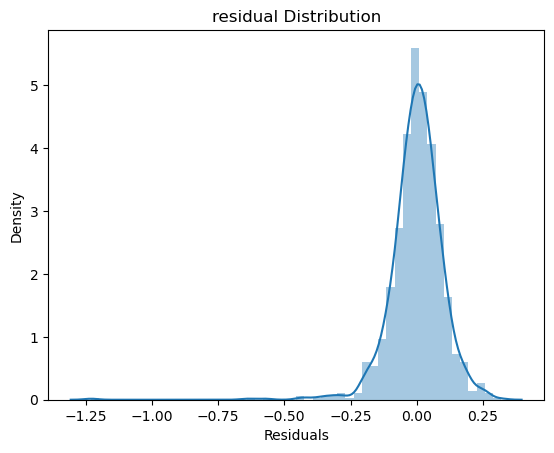

In [57]:
p = sns.distplot(Residulas,kde=True)
p = plt.title('residual Distribution')
plt.xlabel("Residuals")
plt.show()

### <font color= Orange> OBSERVATION:

1. Lambda value of 5 is the best alpha score for Ridge regression
2. Good R2 score for Test and Train datasets are seen with Ridgr regression
3. The Residuals do not have any fixed pattern and follow normal distribution and hence validating the assumptions.

#### 3.1 Lasso REGRESSION

In [58]:
lasso = Lasso()

# cross validation
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = fold, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0,
                                   10.0, 100, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
cross_vali_result_lasso = pd.DataFrame(model_lasso.cv_results_)

Best alpha score is {'alpha': 0.0001}


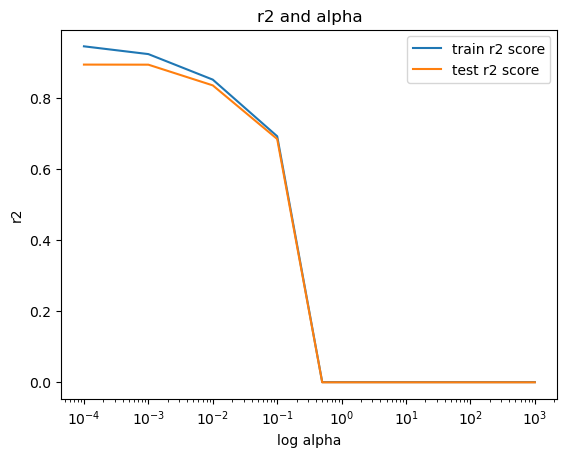

In [60]:
# plot of mean test & mean train scoes with log alpha 
best_alpha_lasso=model_lasso.best_params_
print("Best alpha score is", best_alpha_lasso)
# plotting the graph
plt.plot(cross_vali_result_lasso['param_alpha'], cross_vali_result_lasso['mean_train_score'])
plt.plot(cross_vali_result_lasso['param_alpha'], cross_vali_result_lasso['mean_test_score'])
plt.xscale('log')
plt.xlabel('log alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train r2 score', 'test r2 score'])
plt.show()

In [61]:
lasso = Lasso(alpha=best_alpha_lasso['alpha'])
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [62]:
lasso_Train_score= lasso.score(X_train,y_train)
lasso_Test_score=lasso.score(X_test,y_test)
print ("Lasso R2 train score =", lasso_Train_score)
print ("Lasso R2 test score =", lasso_Test_score)
Lasso_Metric= [lasso_Train_score,lasso_Test_score]

Lasso R2 train score = 0.9395303032668431
Lasso R2 test score = 0.8933388484555422


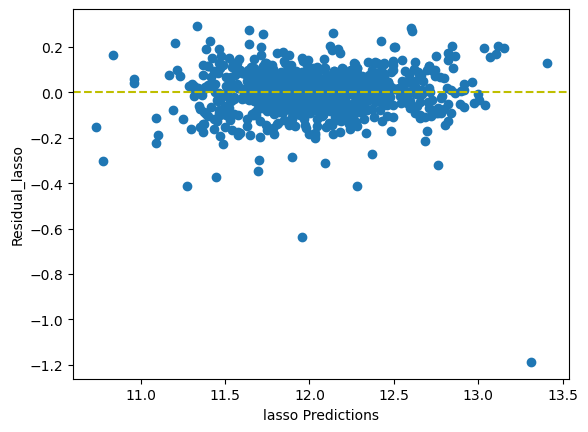

In [63]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

Residulas_lasso = y_train - y_pred_train
plt.scatter( y_pred_train , Residulas_lasso)
plt.axhline(y=0, color='y', linestyle='--')
plt.xlabel("lasso Predictions")
plt.ylabel("Residual_lasso")
plt.show()

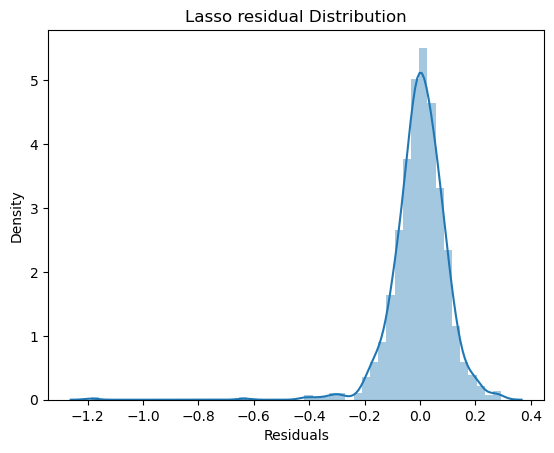

In [64]:
p = sns.distplot(Residulas_lasso,kde=True)

p = plt.title('Lasso residual Distribution')
plt.xlabel("Residuals")
plt.show()

### <font color= Orange> OBSERVATION:

1. Lambda value of 0.0001 is the best alpha score for Lasso regression
2. Good R2 score for Test and Train datasets are seen with Lasso regression
3. The Residuals do not have any fixed pattern and follow normal distribution and hence validating the MLR assumptions.

In [65]:
score_table = pd.DataFrame(list(zip(Ridge_Metric, Lasso_Metric)), columns=['Ridge_R2_score', 'Lasso_R2_score'],index=['Train', 'Test'])

In [66]:
score_table

Ridge_R2_score  Lasso_R2_score
Train        0.934052        0.939530
Test         0.891934        0.893339

In [67]:
Coeff_table=pd.DataFrame(list(zip(ridge.coef_,lasso.coef_)),columns=['Variable_coeff_Ridge', 'Variable_coeff_Lasso'],index=X_test.columns)

In [68]:
Coeff_table

Variable_coeff_Ridge  \
LotFrontage                                                     0.003287   
LotArea                                                         0.007217   
YearRemodAdd                                                    0.022326   
MasVnrArea                                                      0.007724   
BsmtFinSF1                                                      0.025348   
BsmtFinSF2                                                      0.008429   
BsmtUnfSF                                                       0.007237   
TotalBsmtSF                                                     0.036305   
1stFlrSF                                                        0.025477   
2ndFlrSF                                                        0.035450   
LowQualFinSF                                                    0.000000   
GrLivArea                                                       0.049846   
BsmtFullBath                                                    0.011639   
BsmtHalfBath                                                    0.002846   
FullBath                                                        0.018323   
HalfBath                                                        0.015051   
BedroomAbvGr                                                    0.001795   
KitchenAbvGr                                                   -0.015062   
TotRmsAbvGrd                                                    0.023355   
Fireplaces                                                      0.023797   
GarageYrBlt                                                     0.003527   
GarageCars                                                      0.012987   
GarageArea                                                      0.021260   
WoodDeckSF                                                      0.007414   
OpenPorchSF                                                     0.002590   
EnclosedPorch                                                   0.006026   
3SsnPorch                                                       0.000000   
ScreenPorch                                                     0.016898   
PoolArea                                                        0.000000   
MiscVal                                                         0.000348   
MoSold                                                         -0.001795   
PropertyAge                                                    -0.049991   
MSSubClass_1-1/2 STORY FINISHED ALL AGES                        0.015608   
MSSubClass_1-STORY 1945 & OLDER                                -0.081488   
MSSubClass_1-STORY 1946 & NEWER ALL STYLES                      0.017863   
MSSubClass_1-STORY PUD (Planned Unit Developmen...             -0.005354   
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES                    0.037139   
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND...              0.000899   
MSSubClass_2-1/2 STORY ALL AGES                                 0.028630   
MSSubClass_2-STORY 1945 & OLDER                                 0.045929   
MSSubClass_2-STORY 1946 & NEWER                                -0.015053   
MSSubClass_2-STORY PUD - 1946 & NEWER                          -0.075706   
MSSubClass_DUPLEX - ALL STYLES AND AGES                         0.011693   
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER             -0.009694   
MSSubClass_SPLIT FOYER                                          0.006995   
MSSubClass_SPLIT OR MULTI-LEVEL                                 0.008769   
MSZoning_FV                                                     0.053355   
MSZoning_RH                                                     0.059341   
MSZoning_RL                                                     0.066291   
MSZoning_RM                                                     0.026752   
Alley_No Item                                                   0.011385   
Alley_Pave                                                      0.027726   
LotShape_IR2            

In [69]:
Coeff_table['Variable_coeff_Lasso'].sort_values(ascending=False).head(15)

MSZoning_RH                                     0.237041
MSZoning_RL                                     0.212952
MSZoning_FV                                     0.198215
OverallQual_Excellent                           0.189126
Neighborhood_StoneBr                            0.179699
MSZoning_RM                                     0.176359
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES    0.139806
Neighborhood_Crawfor                            0.118990
OverallQual_Very Good                           0.107605
Neighborhood_NridgHt                            0.102715
Exterior1st_BrkFace                             0.097383
RoofStyle_Gambrel                               0.096533
Neighborhood_Somerst                            0.092694
OverallQual_Very Excellent                      0.089486
Neighborhood_NoRidge                            0.080944
Name: Variable_coeff_Lasso, dtype: float64

In [70]:
Coeff_table['Variable_coeff_Lasso'].sort_values(ascending=True).head(15)

OverallQual_Very Poor                   -0.407676
OverallQual_Poor                        -0.274030
OverallCond_Poor                        -0.201034
OverallCond_Fair                        -0.193882
OverallQual_Fair                        -0.153906
OverallCond_Below Average               -0.106565
HeatingQC_Po                            -0.105534
MSSubClass_1-STORY 1945 & OLDER         -0.096661
MSSubClass_2-STORY PUD - 1946 & NEWER   -0.093328
Neighborhood_Edwards                    -0.087133
Neighborhood_MeadowV                    -0.084069
KitchenQual_Fa                          -0.068791
Neighborhood_OldTown                    -0.066687
GarageType_CarPort                      -0.064234
BldgType_Twnhs                          -0.063624
Name: Variable_coeff_Lasso, dtype: float64

### <font color= Orange> FINAL OBSERVATION WITH CONCLUSIONS:

1. Lambda values (Alpha) for Ridge and Lasso regression are:
    - Lambda for Ridge: 5
    - Lambda for Lasso: 0.0001
2. R2 scores for Ridge and Lasso are:
    - Ridge: Train – 0.934052, Test – 0.891934
    - Lasso: Train – 0.939530, Test – 0.893339

3. From observation 2 both Ridge and Lasso regressions are working well and have similar R2 scores but Lasso has a slight better test R2 score hence this is taken for further explanations 

4. 5 most important numeric predictor variables based on correlations are
    
    a. GrLivArea
    
    b. GarageCars
    
    c. GarageArea
    
    d. TotalbsmntSF
    
    e. 1stFlrSF

    
5. Based on the Lasso coefficients the overall best factors which govern the selling price are
    
    a. MSZoning (mostly residential)
    
    b. OverallQual (Rated Excellent, verygood, very excellent)
    
    c. Neighborhood (Stone brook, Crawford, Northridge Heights, Northridge)
    
    d. Dwelling class (STORY W/FINISHED ATTIC ALL AGES)
    
    e. Brick face exterior
    
    f. Gabrel (Barn) roofstyle 
  
    
6. Based on Lasso regression coefficients the overall worst factors that govern selling price are
    
    a. Overall quality and Condition of property (verypoor, poor, fair, below average)
    
    b. Dwelling type (aged properties)
    
    c. Towhhouse style building type
    
    d. Neighborhood (Edwards, Meadow Village, Oldtown)
    
    

#### Q1

In [71]:
Coeff_table['Variable_coeff_Ridge'].sort_values(ascending=False).head(15)

OverallQual_Excellent    0.143510
Neighborhood_StoneBr     0.133981
Neighborhood_Crawfor     0.104176
OverallQual_Very Good    0.092749
Neighborhood_NridgHt     0.083310
Exterior1st_BrkFace      0.077127
SaleCondition_Partial    0.076561
Neighborhood_Somerst     0.073084
MSZoning_RL              0.066291
OverallCond_Excellent    0.063386
BsmtCond_Gd              0.063366
BsmtCond_TA              0.061957
SaleCondition_Normal     0.060968
MSZoning_RH              0.059341
Exterior1st_Stucco       0.056914
Name: Variable_coeff_Ridge, dtype: float64

In [72]:
ridge_10 = Ridge(alpha=10)
ridge_10.fit(X_train, y_train)
ridge_10_Train_score= ridge_10.score(X_train,y_train)
ridge_10_Test_score=ridge_10.score(X_test,y_test)
print ("ridge_10 R2 train score =", ridge_10_Train_score)
print ("ridge_10 R2 test score =", ridge_10_Test_score)

ridge_10 R2 train score = 0.9294512026289694
ridge_10 R2 test score = 0.8914989626789392


In [73]:
lasso_0002 = Lasso(alpha=0.0002)
lasso_0002.fit(X_train, y_train)
lasso_0002_Train_score= lasso_0002.score(X_train,y_train)
lasso_0002_Test_score=lasso_0002.score(X_test,y_test)
print ("lasso_0002 R2 train score =", lasso_0002_Train_score)
print ("lasso_0002 R2 test score =", lasso_0002_Test_score)

lasso_0002 R2 train score = 0.9362748712360948
lasso_0002 R2 test score = 0.8922786446512403


In [74]:
Coeff_table_double=pd.DataFrame(list(zip(ridge_10.coef_,lasso_0002.coef_)),columns=['Variable_coeff_Ridge', 'Variable_coeff_Lasso'],index=X_test.columns)

In [75]:
Coeff_table_double['Variable_coeff_Ridge'].sort_values(ascending=False).head(5)

OverallQual_Excellent    0.118201
Neighborhood_StoneBr     0.102800
Neighborhood_Crawfor     0.091551
OverallQual_Very Good    0.082868
Neighborhood_NridgHt     0.068983
Name: Variable_coeff_Ridge, dtype: float64

In [76]:
Coeff_table_double['Variable_coeff_Lasso'].sort_values(ascending=False).head(5)

OverallQual_Excellent    0.187028
Neighborhood_StoneBr     0.168095
Neighborhood_Crawfor     0.114941
MSZoning_RH              0.105237
OverallQual_Very Good    0.104521
Name: Variable_coeff_Lasso, dtype: float64

#### Q3

In [77]:
lasso_0001 = Lasso(alpha=0.0002)
X_train.drop(['MSZoning_RH','MSZoning_RL','MSZoning_FV','OverallQual_Excellent','Neighborhood_StoneBr'],axis=1,inplace=True)
X_test.drop(['MSZoning_RH','MSZoning_RL','MSZoning_FV','OverallQual_Excellent','Neighborhood_StoneBr'],axis=1,inplace=True)

In [78]:
lasso_0001.fit(X_train, y_train)
lasso_0001_Train_score= lasso_0001.score(X_train,y_train)
lasso_0001_Test_score=lasso_0001.score(X_test,y_test)
print ("lasso_0001 R2 train score =", lasso_0001_Train_score)
print ("lasso_0001 R2 test score =", lasso_0001_Test_score)

lasso_0001 R2 train score = 0.9295598143752961
lasso_0001 R2 test score = 0.8834324466092086


In [79]:
Coeff_table_lasso=pd.DataFrame(list(lasso_0001.coef_),columns=['Variable_coeff_Lasso'],index=X_test.columns)

In [80]:
Coeff_table_lasso['Variable_coeff_Lasso'].sort_values(ascending=False).head(5)

Neighborhood_Crawfor     0.097808
GrLivArea                0.087863
Neighborhood_NridgHt     0.085094
Exterior1st_BrkFace      0.084292
SaleCondition_Partial    0.079977
Name: Variable_coeff_Lasso, dtype: float64